In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
height = [60, 62, 65, 68, 70, 74]
weight = [140, 138, 150, 166, 190, 250]

In [3]:
np.corrcoef(height, weight)[0][1]

0.9298974521408027

In [4]:
df = pd.read_csv("./insurance.csv")

In [5]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [6]:
df.charges.corr(df.bmi)

0.19834096883362884

In [7]:
corr= stats.pearsonr(df.charges, df.age)

In [8]:
corr

PearsonRResult(statistic=0.29900819333064754, pvalue=4.886693331718191e-29)

In [9]:
corr_df = pd.DataFrame(columns=["r", "p"])
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and col != "charges":
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]
corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


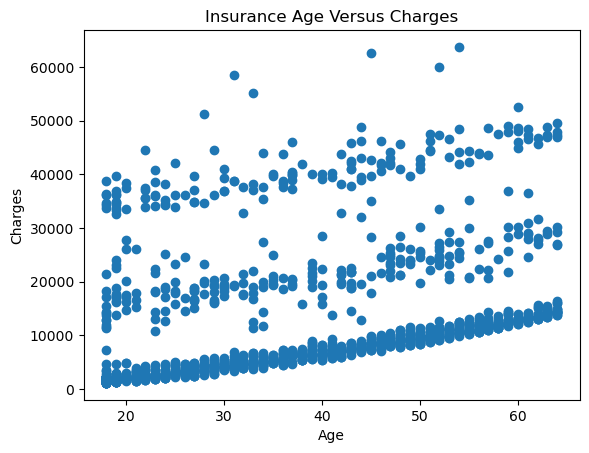

In [10]:
plt.scatter(df.age, df.charges)
plt.title("Insurance Age Versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

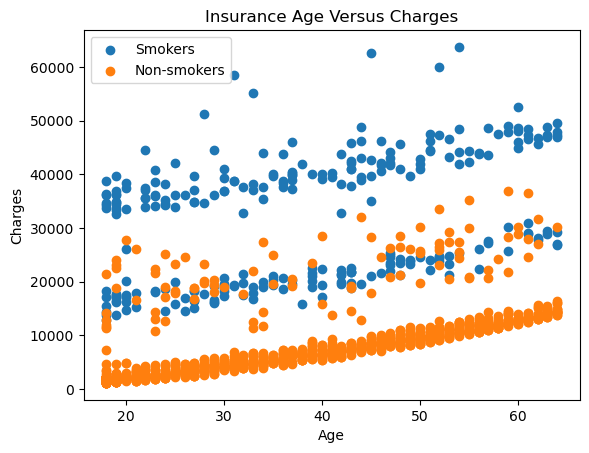

In [11]:
df_smoker = df[df["smoker"]=="yes"]
df_nonsmoker = df[df["smoker"]=="no"]

plt.scatter(df_smoker.age, df_smoker.charges, label="Smokers")
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label="Non-smokers")
plt.title("Insurance Age Versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

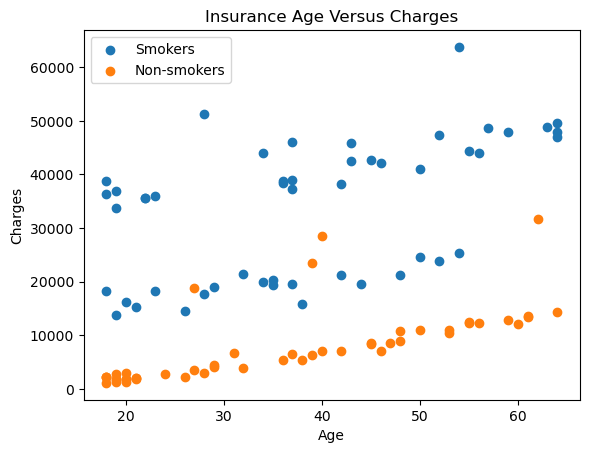

In [12]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label="Smokers")
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label="Non-smokers")
plt.title("Insurance Age Versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

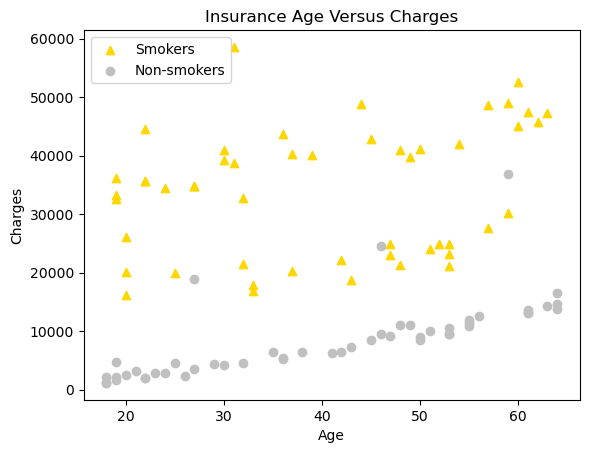

In [13]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label="Smokers", color="gold", marker="^")
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label="Non-smokers", color="silver", marker="o")
plt.title("Insurance Age Versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

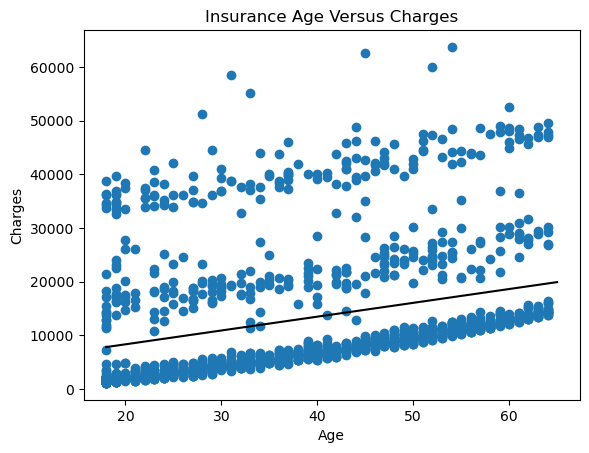

In [14]:
m, b, r, p, err= stats.linregress(df.age, df.charges)

x= range(18, df.age.max() + 2)
y = m * x + b

plt.plot(x, y, color="black")
plt.scatter(df.age, df.charges)
plt.title("Insurance Age Versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [15]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [16]:
model = ols(formula="charges~age", data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breushpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=["LM stat", "LM p", "F stat", "F stat p"])
output_df.loc["White"] = white_test
output_df.loc["Breusch-Pagan"] = breushpagan_test

output_df

,LM stat,LM p,F stat,F stat p
White,0.002713,0.998645,0.001353,0.998648
Breusch-Pagan,0.000413,0.983776,0.000413,0.983792


In [17]:
import seaborn as sns

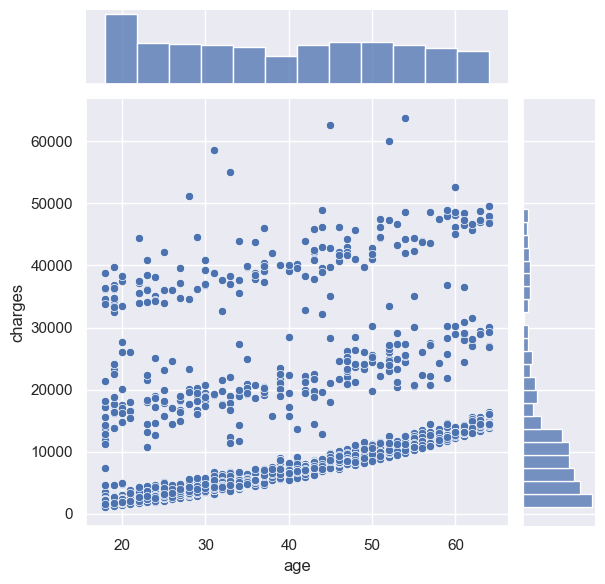

In [18]:
sns.set(color_codes=True)
sns.jointplot(x="age", y="charges", data=df)
plt.show()

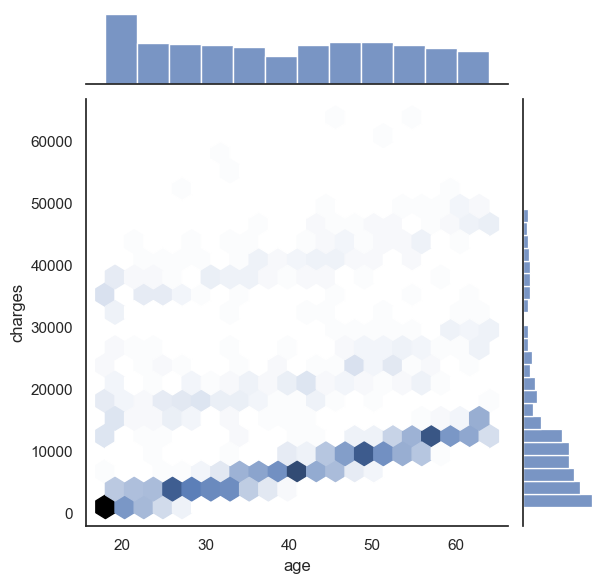

In [19]:
sns.set_style("white")
sns.jointplot(x="age", y="charges", data=df, kind="hex")


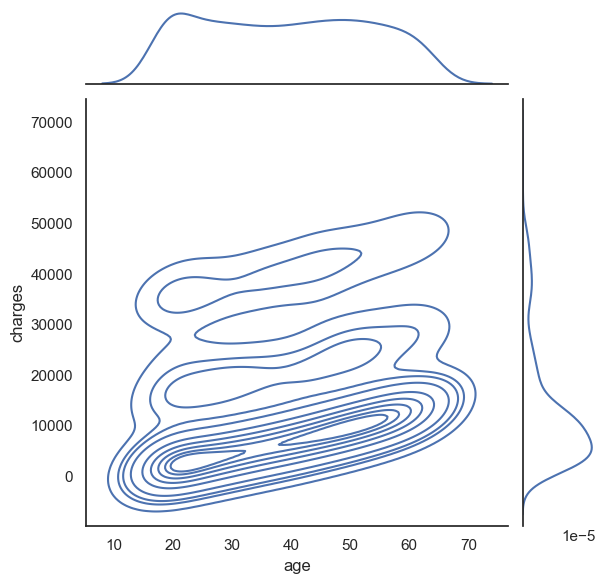

In [20]:
sns.jointplot(x="age", y="charges", data=df, kind="kde")


/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_65042/3808095259.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x= "age", y="charges", cmap=cmap, n_levels=60, shade=True)


<Axes: xlabel='age', ylabel='charges'>

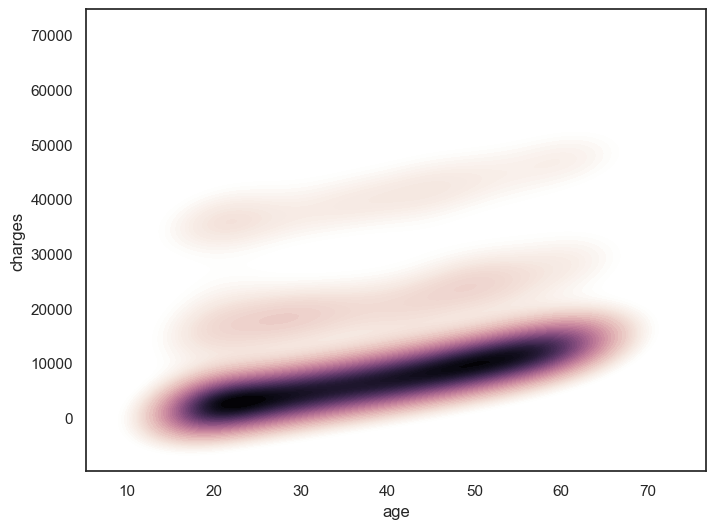

In [21]:
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.kdeplot(data=df, x= "age", y="charges", cmap=cmap, n_levels=60, shade=True)

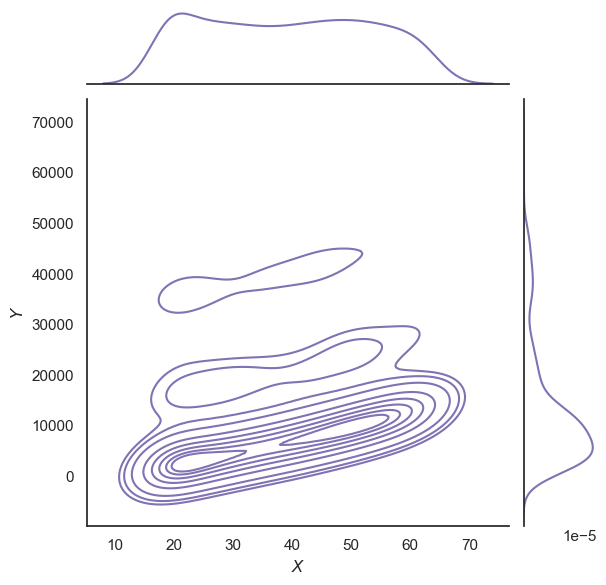

In [22]:
g = sns.jointplot(x="age", y="charges", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+") 
g.ax_joint.collections[0].set_alpha(0) 
g.set_axis_labels ("$X$", "$Y$")

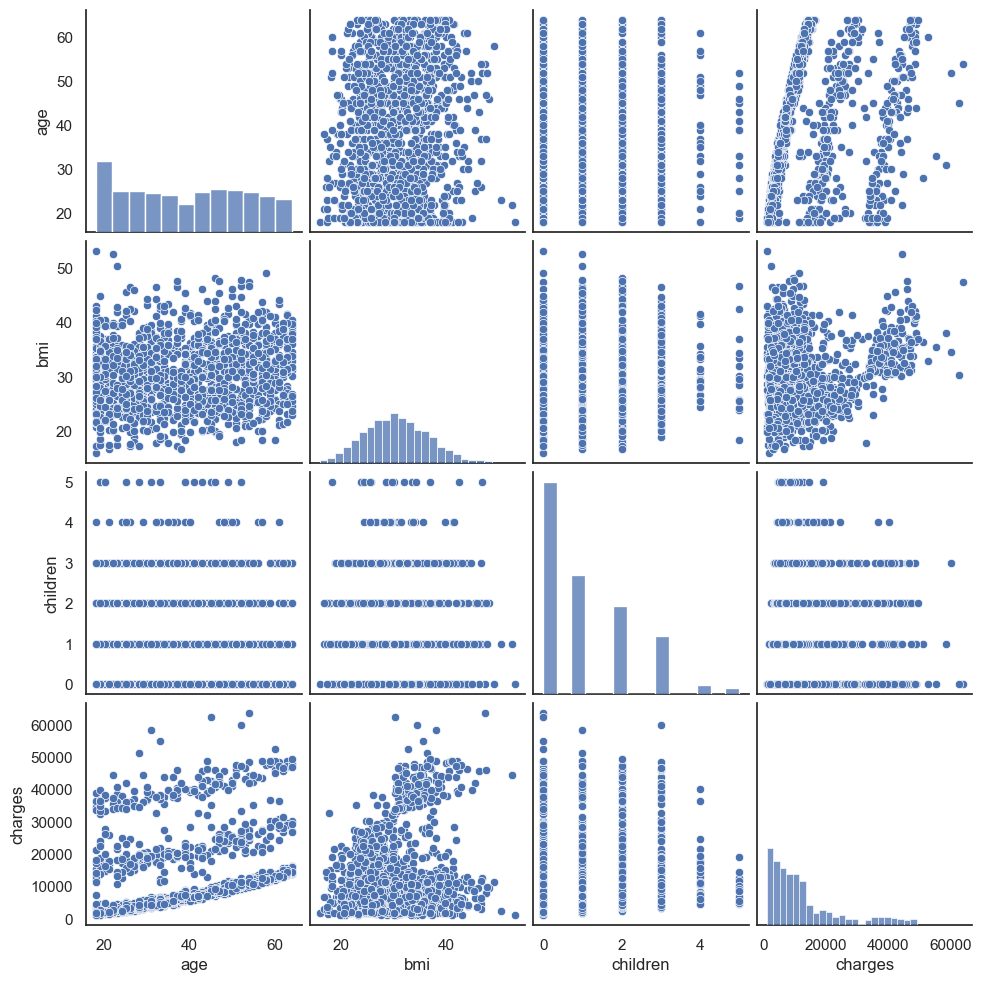

In [23]:
sns.pairplot(df)

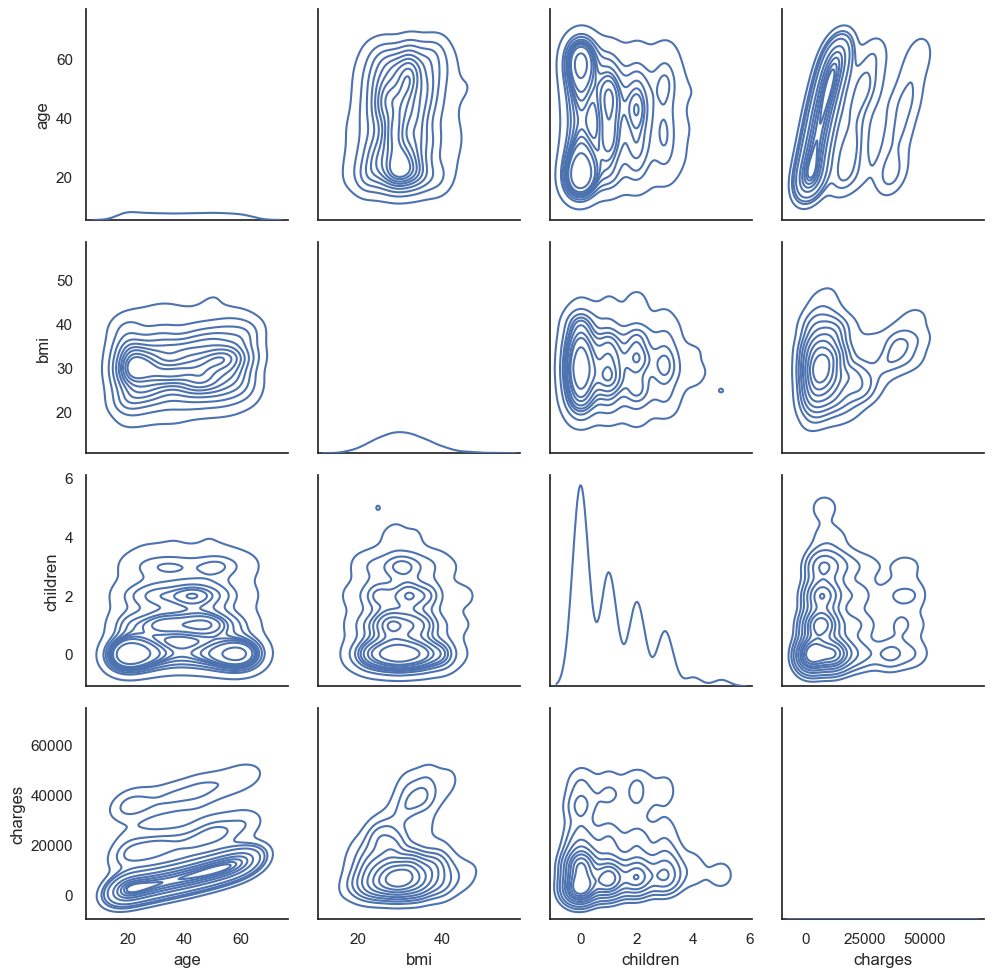

In [24]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=10)

In [30]:
import plotly.express as px

fig = px.scatter_3d(df, x="age", y="charges", z="bmi", color="smoker", symbol="sex", size="children")
fig.show()